**Objective:** Check for possible overlaps between frequencies (qubits, readout, LOs, and TWPA) and their harmonics:

- The TWPA pump frequency can inject noise if there are overlaps.

- LOs and mixers can generate spurious signals at integer multiples of their frequency.

LOs and TWPA frequencies:

TWPA Frequency: 6679000000
Drive line LOs: [4305409000, 4410592000, 4738318000, 4336921000, 4478819000]
Readout line LO - q0 and q1: 5100000000
Readout line LO - q2, q3 and q4: 5950000000


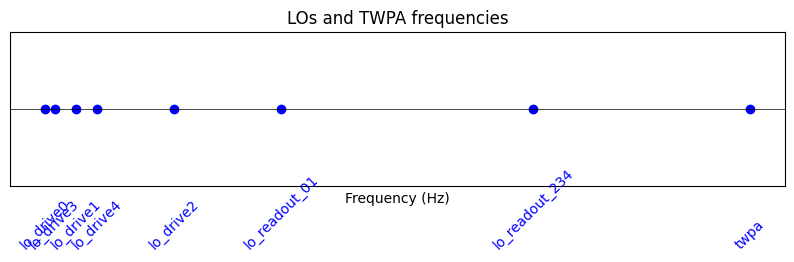

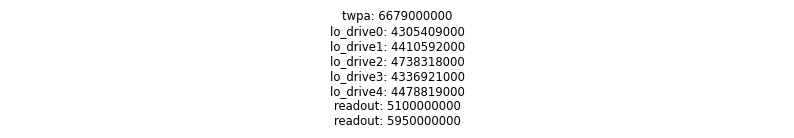

In [30]:
import json
import matplotlib.pyplot as plt

# Read the parameters.json file
with open('/home/users/laura.martinez/qibolab_platforms_qrc/iqm5q/parameters.json') as f:
    data = json.load(f)

# Extract the required variables
twpa_frequency = data.get('instruments', {}).get('twpa_pump0', {}).get('frequency')

lo_readout_frequency_q0q1 = data.get('instruments', {}).get('qrm_rf0', {}).get('o1', {}).get('lo_frequency')
lo_readout_frequency_q2q3q4 = data.get('instruments', {}).get('qrm_rf1', {}).get('o1', {}).get('lo_frequency')

lo_drive_frequencies = [
    data.get('instruments', {}).get('qcm_rf2', {}).get('o1', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf0', {}).get('o1', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf0', {}).get('o2', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf1', {}).get('o1', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf1', {}).get('o2', {}).get('lo_frequency')

]

# Check that the frequencies have been extracted correctly
print("TWPA Frequency:", twpa_frequency)
print("Drive line LOs:", lo_drive_frequencies)
print("Readout line LO - q0 and q1:", lo_readout_frequency_q0q1)
print("Readout line LO - q2, q3 and q4:", lo_readout_frequency_q2q3q4)

# Create the combined plot
plt.figure(figsize=(10, 2))

if twpa_frequency:
    plt.plot(twpa_frequency, 0, 'bo')
    plt.text(twpa_frequency, -0.1, 'twpa', ha='center', color='blue', rotation=45)
for i, freq in enumerate(lo_drive_frequencies):
    if freq:
        plt.plot(freq, 0, 'bo')
        plt.text(freq, -0.1, f'lo_drive{i}', ha='center', color='blue', rotation=45)
if lo_readout_frequency_q0q1:
    plt.plot(lo_readout_frequency_q0q1, 0, 'bo')
    plt.text(lo_readout_frequency_q0q1, -0.1, 'lo_readout_01', ha='center', color='blue', rotation=45)
if lo_readout_frequency_q2q3q4:
    plt.plot(lo_readout_frequency_q2q3q4, 0, 'bo')
    plt.text(lo_readout_frequency_q2q3q4, -0.1, 'lo_readout_234', ha='center', color='blue', rotation=45)

plt.yticks([])
plt.xticks([])
plt.xlabel('Frequency (Hz)')
plt.title('LOs and TWPA frequencies')
plt.axhline(0, color='black', linewidth=0.5)

plt.show()

legend_entries = []
if twpa_frequency:
    legend_entries.append(f'twpa: {twpa_frequency}')
for i, freq in enumerate(lo_drive_frequencies):
    if freq:
        legend_entries.append(f'lo_drive{i}: {freq}')
if lo_readout_frequency_q0q1:
    legend_entries.append(f'readout: {lo_readout_frequency_q0q1}')
if lo_readout_frequency_q2q3q4:
    legend_entries.append(f'readout: {lo_readout_frequency_q2q3q4}')
    

# Create a new figure for the legend
plt.figure(figsize=(10, 1))
plt.axis('off')
plt.text(0.5, 0.5, '\n'.join(legend_entries), ha='center', va='center', fontsize='small')
plt.show()



Qubits and readouts frequencies:

Qubit Frequencies: [4103158043, 4257678015, 4543230117, 4101313618, 4354036834]
Resonator Frequencies: [5226976330, 4928845888, 6114827652, 5808431510, 5532640418]


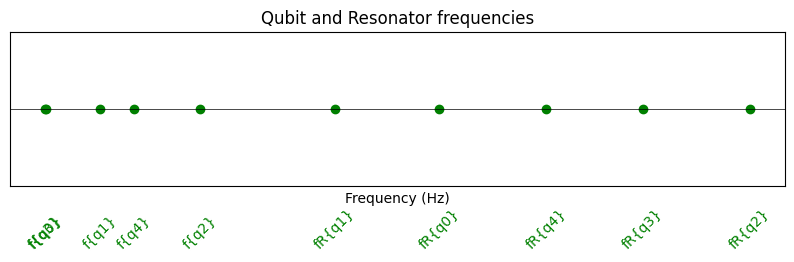

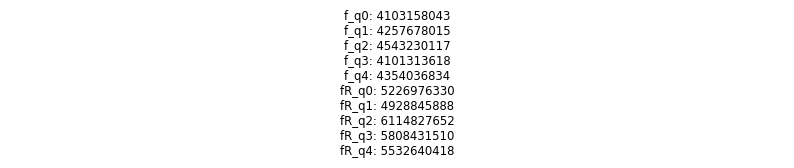

In [31]:
import json
import matplotlib.pyplot as plt

# Leer el archivo parameters.json
with open('/home/users/laura.martinez/qibolab_platforms_qrc/iqm5q/parameters.json') as f:
    data = json.load(f)

# Extraer las variables necesarias
qubit_frequencies = [
    data.get('native_gates', {}).get('single_qubit', {}).get(str(i), {}).get('RX', {}).get('frequency')
    for i in range(5)
]
resonator_frequencies = [
    data.get('native_gates', {}).get('single_qubit', {}).get(str(i), {}).get('MZ', {}).get('frequency')
    for i in range(5)
]

# Verificar que las frecuencias se han extraído correctamente
print("Qubit Frequencies:", qubit_frequencies)
print("Resonator Frequencies:", resonator_frequencies)

# Crear el gráfico
plt.figure(figsize=(10, 2))
legend_entries = []

for i, freq in enumerate(qubit_frequencies):
    if freq:
        plt.plot(freq, 0, 'go')
        plt.text(freq, -0.1, f'f{{q{i}}}', ha='center', color='green', rotation=45)
        legend_entries.append(f'f_q{i}: {freq}')
for i, freq in enumerate(resonator_frequencies):
    if freq:
        plt.plot(freq, 0, 'go')
        plt.text(freq, -0.1, f'fR{{q{i}}}', ha='center', color='green', rotation=45)
        legend_entries.append(f'fR_q{i}: {freq}')

plt.yticks([])
plt.xticks([])
plt.xlabel('Frequency (Hz)')
plt.title('Qubit and Resonator frequencies')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

# Crear una nueva figura para la leyenda
plt.figure(figsize=(10, 1))
plt.axis('off')
plt.text(0.5, 0.5, '\n'.join(legend_entries), ha='center', va='center', fontsize='small')
plt.show()

Combination of all the previously mentioned variables into a single plot, highlighting the following regions:

- ±2 MHz around each f{qi}, with i from 0 to 4, in orange.

- ±500 MHz around the "lo_frequency" variable — labeled as "readout" — in purple.

TWPA Frequency: 6679000000
Drive Frequencies: [4305409000, 4410592000, 4738318000, 4336921000, 4478819000]
Readout Frequency q0q1: 5100000000
Readout Frequency q2q3q4: 5950000000
Qubit Frequencies: [4103158043, 4257678015, 4543230117, 4101313618, 4354036834]
Resonator Frequencies: [5226976330, 4928845888, 6114827652, 5808431510, 5532640418]


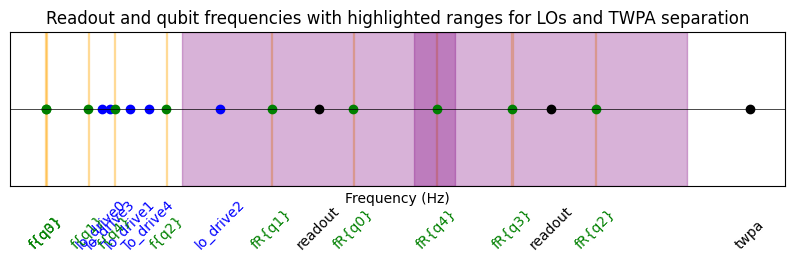

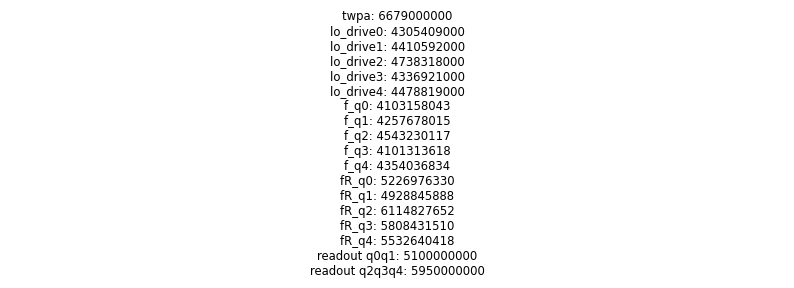

In [32]:
import json
import matplotlib.pyplot as plt

# Read the parameters.json file
with open('/home/users/laura.martinez/qibolab_platforms_qrc/iqm5q/parameters.json') as f:
    data = json.load(f)

# Extract the required variables

twpa_frequency = data.get('instruments', {}).get('twpa_pump0', {}).get('frequency')

readout_frequency_q0q1 = data.get('instruments', {}).get('qrm_rf0', {}).get('o1', {}).get('lo_frequency')
readout_frequency_q2q3q4 = data.get('instruments', {}).get('qrm_rf1', {}).get('o1', {}).get('lo_frequency')

drive_frequencies = [
    data.get('instruments', {}).get('qcm_rf2', {}).get('o1', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf0', {}).get('o1', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf0', {}).get('o2', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf1', {}).get('o1', {}).get('lo_frequency'),
    data.get('instruments', {}).get('qcm_rf1', {}).get('o2', {}).get('lo_frequency')
]

qubit_frequencies = [
    data.get('native_gates', {}).get('single_qubit', {}).get(str(i), {}).get('RX', {}).get('frequency')
    for i in range(5)
]
resonator_frequencies = [
    data.get('native_gates', {}).get('single_qubit', {}).get(str(i), {}).get('MZ', {}).get('frequency')
    for i in range(5)
]

# Check that the frequencies have been extracted correctly
print("TWPA Frequency:", twpa_frequency)
print("Drive Frequencies:", drive_frequencies)
print("Readout Frequency q0q1:", readout_frequency_q0q1)
print("Readout Frequency q2q3q4:", readout_frequency_q2q3q4)
print("Qubit Frequencies:", qubit_frequencies)
print("Resonator Frequencies:", resonator_frequencies)

# Create the combined plot
plt.figure(figsize=(10, 2))
legend_entries = []

if twpa_frequency:
    plt.plot(twpa_frequency, 0, 'ko')
    plt.text(twpa_frequency, -0.1, 'twpa', ha='center', color='black', rotation=45)
    legend_entries.append(f'twpa: {twpa_frequency}')
for i, freq in enumerate(drive_frequencies):
    if freq:
        plt.plot(freq, 0, 'bo')
        plt.text(freq, -0.1, f'lo_drive{i}', ha='center', color='blue', rotation=45)
        legend_entries.append(f'lo_drive{i}: {freq}')
for i, freq in enumerate(qubit_frequencies):
    if freq:
        plt.plot(freq, 0, 'go')
        plt.text(freq, -0.1, f'f{{q{i}}}', ha='center', color='green', rotation=45)
        plt.axvspan(freq - 2e6, freq + 2e6, color='orange', alpha=0.3)
        legend_entries.append(f'f_q{i}: {freq}')
for i, freq in enumerate(resonator_frequencies):
    if freq:
        plt.plot(freq, 0, 'go')
        plt.text(freq, -0.1, f'fR{{q{i}}}', ha='center', color='green', rotation=45)
        plt.axvspan(freq - 2e6, freq + 2e6, color='orange', alpha=0.3)
        legend_entries.append(f'fR_q{i}: {freq}')
if readout_frequency_q0q1:
    plt.plot(readout_frequency_q0q1, 0, 'ko')
    plt.text(readout_frequency_q0q1, -0.1, 'readout', ha='center', color='black', rotation=45)
    plt.axvspan(readout_frequency_q0q1 - 5e8, readout_frequency_q0q1 + 5e8, color='purple', alpha=0.3)
    legend_entries.append(f'readout q0q1: {readout_frequency_q0q1}')
if readout_frequency_q2q3q4:
    plt.plot(readout_frequency_q2q3q4, 0, 'ko')
    plt.text(readout_frequency_q2q3q4, -0.1, 'readout', ha='center', color='black', rotation=45)
    plt.axvspan(readout_frequency_q2q3q4 - 5e8, readout_frequency_q2q3q4 + 5e8, color='purple', alpha=0.3)
    legend_entries.append(f'readout q2q3q4: {readout_frequency_q2q3q4}')

plt.yticks([])
plt.xticks([])
plt.xlabel('Frequency (Hz)')
plt.title('Readout and qubit frequencies with highlighted ranges for LOs and TWPA separation')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

# Create a new figure for the legend
plt.figure(figsize=(10, 1))
plt.axis('off')
plt.text(0.5, 0.5, '\n'.join(legend_entries), ha='center', va='center', fontsize='small')
plt.show()

Deteccion de armonicos:

